<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/Sound_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sound Visualisation**

William Huang

Bartlett School of Architecture, 2024

In [9]:
!pip install matplotlib numpy scipy


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
import scipy.fftpack

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# Load the WAV file
file_path = '/content/drive/My Drive/example.wav'  #@param{type:'string'}
sampling_rate, data = wav.read(file_path)

<ipython-input-5-a746fda0949c>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wav.read(file_path)


In [17]:
# Check if the audio is mono or stereo and take only the first channel if it's stereo
if len(data.shape) > 1:
    data = data[:,0]

# Extract the first 10 seconds
duration = 10  # seconds
samples = duration * sampling_rate
data = data[:samples]

# Time array for plotting
time = np.arange(samples) / sampling_rate

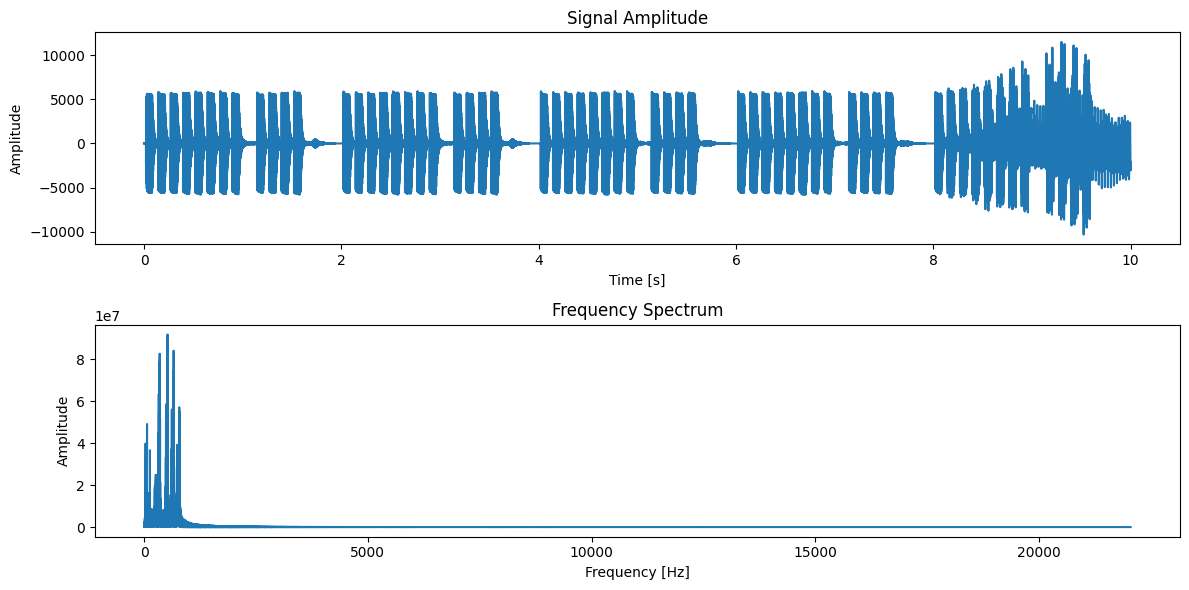

In [18]:
# Plot the signal amplitude
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, data)
plt.title('Signal Amplitude')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Frequency spectrum
data_fft = scipy.fftpack.fft(data)
freqs = scipy.fftpack.fftfreq(len(data_fft), 1/sampling_rate)
indices = np.arange(len(data_fft)//2)

plt.subplot(2, 1, 2)
plt.plot(freqs[indices], np.abs(data_fft[indices]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency [Hz]')

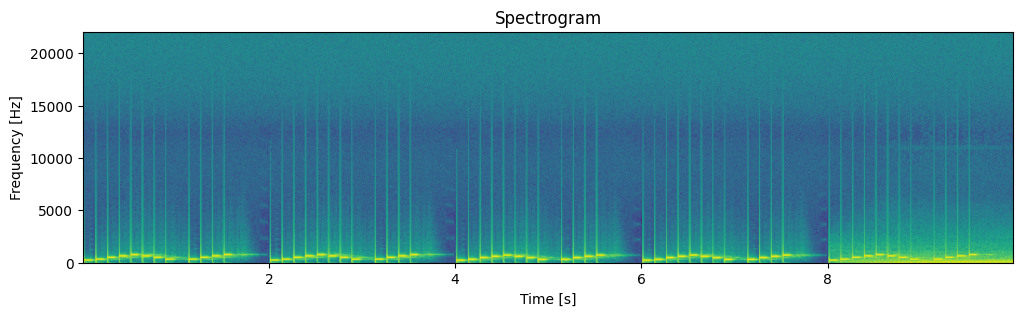

In [19]:
# Plot the spectrogram
plt.figure(figsize=(12, 3))
plt.specgram(data, Fs=sampling_rate, NFFT=1024, noverlap=512, cmap='viridis')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')